In [11]:
!pip install tensorflow

In [26]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [68]:
train_dir = r"E:\MINI PROJECT\Train"
test_dir = r"E:\MINI PROJECT\Test"

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 64
EPOCHS = 1
LR =  0.00003
NUM_CLASSES = 7
CLASS_LABELS = ['Abuse','Assault','Fighting',"Normal",'RoadAccidents','Shoplifting','Stealing']

In [70]:
preprocess_fun = tf.keras.applications.densenet.preprocess_input

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale = 1./255,
                                   preprocessing_function=preprocess_fun
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  preprocessing_function=preprocess_fun
                                 )

In [72]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = True , 
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = SEED
                                                   )
test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                   target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = False , 
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = SEED
                                                  )

Found 1095011 images belonging to 7 classes.
Found 81407 images belonging to 7 classes.


In [73]:
fig = px.bar(x = CLASS_LABELS,
             y = [list(train_generator.classes).count(i) for i in np.unique(train_generator.classes)] , 
             color = np.unique(train_generator.classes) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Classes")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [74]:
fig = px.bar(x = CLASS_LABELS,
             y = [list(test_generator.classes).count(i) for i in np.unique(test_generator.classes)] , 
             color = np.unique(train_generator.classes) ,
             color_continuous_scale="Emrld") 
fig.update_xaxes(title="Classes")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Test Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [75]:

NUM_CLASSES = 7 
CLASS_LABELS = ['Abuse','Assault','Fighting',"Normal",'RoadAccidents','Shoplifting','Stealing']


def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.4) (x)
    x = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name="classification")(x)  # 7 output units

    return x


def define_compile_model():
    inputs = tf.keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    classification_output = classifier(inputs)  # Use classifier to build the classification layers
    model = tf.keras.Model(inputs=inputs, outputs=classification_output)

    model.compile(optimizer=tf.keras.optimizers.SGD(LR), 
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.AUC()])

    return model



model = define_compile_model()
clear_output()
model.summary()




Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_10     │ (None, 3)              │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 792,583 (3.02 MB)

 Trainable params: 792,583 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(x = train_generator,validation_data=test_generator,epochs = EPOCHS)

17110/17110 ━━━━━━━━━━━━━━━━━━━━ 48372s 3s/step - auc_2: 0.9246 - loss: 0.8348 - val_auc_2: 0.9219 - val_loss: 0.8585


1272/1272 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step
ROC AUC score: 0.8756346636433885


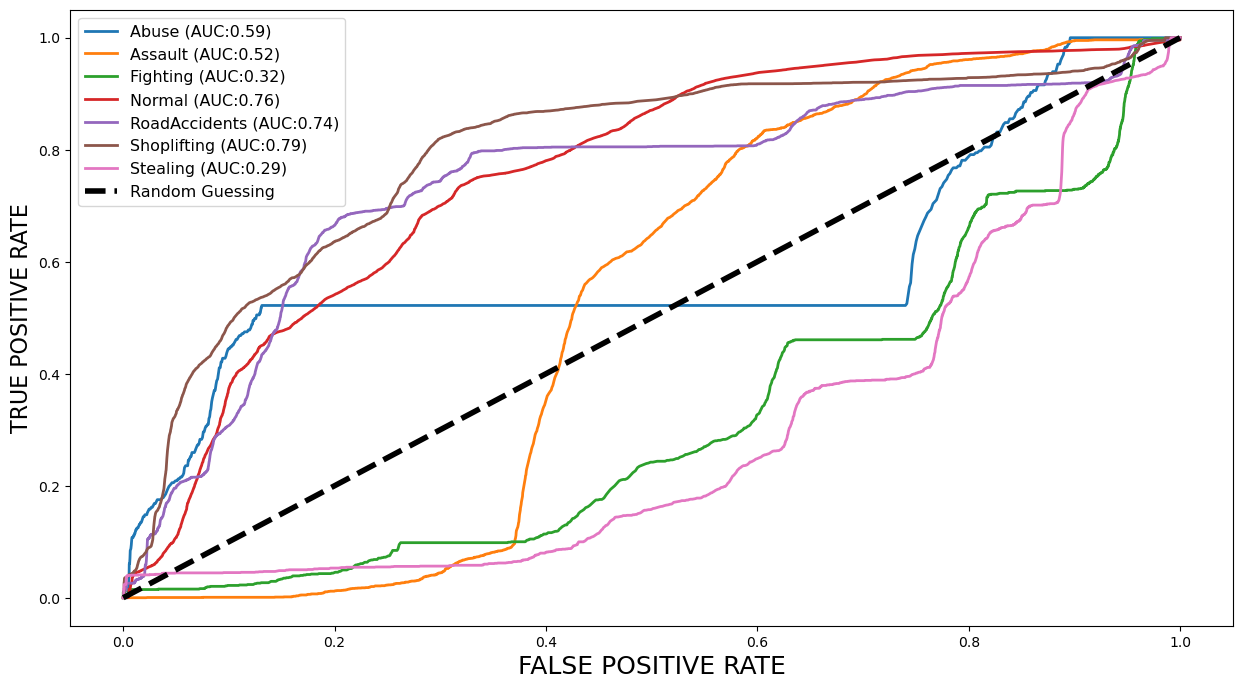

In [76]:
preds = model.predict(test_generator)
y_test = test_generator.classes
fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()

In [159]:
model.save_weights("model_weights.weights.h5")

In [2]:
pip install tensorflow opencv-python-headless pillow

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.8 MB 11.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/38.8 MB 8.8 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/38.8 MB 7.1 MB/s eta 0:00:05
   ----- ---------------------------------- 5.8/38.8 MB 7.3 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/38.8 MB 6.5 MB/s eta 0:00:05
   ------- -------------------------------- 7.3/38.8 MB 6.1 MB/s eta 0:00:06
   -------- ------------------------------- 8.4/38.8 MB 5.9 MB/s eta 0:00:06
   ---------- ----------------------------- 9.7/38.8 MB 5.9 MB/s eta 0:00:05
   ----------- ---------------------------- 11.3/38.8 MB 6.1 MB/s eta 0:00:05
   ------------- -------------------------- 13.1/38.8 MB 6.3 MB/s eta 0:00:05
   -------------- ------------------------- 13.9/38.8 MB 6.2 MB/s eta 0:00:04
   -------------- ------------------------- 14.4/38.8 MB 6.0 MB/s eta 0:00:05
 

In [77]:
import tensorflow as tf

# Load the trained model
model = define_compile_model()
model.load_weights(r"C:\Users\KARAN SINGH\Documents\python\model_weights.weights.h5")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model as a .tflite file
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\KARANS~1\AppData\Local\Temp\tmpz2pos4qg\assets


INFO:tensorflow:Assets written to: C:\Users\KARANS~1\AppData\Local\Temp\tmpz2pos4qg\assets


Saved artifact at 'C:\Users\KARANS~1\AppData\Local\Temp\tmpz2pos4qg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_155')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2914010597520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2914010598672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2914010597904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2914010599824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2914010598096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2914010601168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2914010599248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2914010602320: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [93]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image, ImageTk

# Define global constants
IMG_HEIGHT = 64
IMG_WIDTH = 64
CLASS_LABELS = ['Abuse', 'Assault', 'Fighting', "Normal", 'RoadAccidents', 'Shoplifting', 'Stealing']

# Load the trained model
model = define_compile_model()
model.load_weights(r"C:\Users\KARAN SINGH\Documents\python\model_weights.weights.h5")  # Add the path to your trained model weights

# Function to preprocess frames
def preprocess_frame(frame):
    frame = cv2.resize(frame, (IMG_HEIGHT, IMG_WIDTH))
    frame = img_to_array(frame)
    frame = np.expand_dims(frame, axis=0)
    frame = frame / 255.0  # Rescaling as done in ImageDataGenerator
    return frame

# Function to make predictions on frames
# Function to make predictions on frames
def predict_action(frame):
    frame = preprocess_frame(frame)
    prediction = model.predict(frame)
    class_idx = np.argmax(prediction)  # Find the index of the class with the highest probability
    confidence = prediction[0][class_idx]  # Get the confidence (probability)
    return CLASS_LABELS[class_idx], confidence  # Return both the action and confidence


# OpenCV function to read video
def play_video(video_path):
    cap = cv2.VideoCapture(video_path)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        # Predict action
        action, confidence = predict_action(frame)
        # Detect anomalies
        is_anomaly = action != "Normal"
        anomaly_status = "Anomaly Detected" if is_anomaly else "Normal Activity"
        confidence_text = f"Confidence: {confidence:.2f}"

        # Display the frame and detection results
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)
        img_tk = ImageTk.PhotoImage(img)
        
        label_image.config(image=img_tk)
        label_image.image = img_tk
        label_text.config(text=f"Detected Action: {action}")
        label_status.config(text=anomaly_status, fg="red" if is_anomaly else "green")
        label_confidence.config(text=confidence_text)
        
        root.update()
        
    cap.release()

# GUI function to load video
def load_video():
    video_path = filedialog.askopenfilename(filetypes=[("Video files", "*.mp4;*.avi;*.mov")])
    if video_path:
        play_video(video_path)

# Setting up the Tkinter GUI
root = tk.Tk()
root.title("Real-Time Action Detection")
root.geometry("800x600")

# Display area for the video
label_image = tk.Label(root)
label_image.pack()

# Text label to show detected action
label_text = tk.Label(root, text="Detected Action: None", font=("Helvetica", 16))
label_text.pack()

# Status label for anomaly detection
label_status = tk.Label(root, text="Normal Activity", font=("Helvetica", 16), fg="green")
label_status.pack()

# Confidence level label
label_confidence = tk.Label(root, text="Confidence: N/A", font=("Helvetica", 14))
label_confidence.pack()

# Button to open and load video
button = tk.Button(root, text="Load Video", command=load_video)
button.pack()

# Start the GUI event loop
root.mainloop()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

Exception in Tkinter callback
Exception ignored in: <function PhotoImage.__del__ at 0x000002A636D22CA0>
Traceback (most recent call last):
  File "C:\Users\KARAN SINGH\anaconda3\Lib\site-packages\PIL\ImageTk.py", line 132, in __del__
    name = self.__photo.name
           ^^^^^^^^^^^^
AttributeError: 'PhotoImage' object has no attribute '_PhotoImage__photo'
Traceback (most recent call last):
  File "C:\Users\KARAN SINGH\anaconda3\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\KARAN SINGH\AppData\Local\Temp\ipykernel_13448\2477521895.py", line 68, in load_video
    play_video(video_path)
  File "C:\Users\KARAN SINGH\AppData\Local\Temp\ipykernel_13448\2477521895.py", line 52, in play_video
    img_tk = ImageTk.PhotoImage(img)
             ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KARAN SINGH\anaconda3\Lib\site-packages\PIL\ImageTk.py", line 126, in __init__
    self.__photo = tkinter.PhotoImage(**kw)
             